In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Loading datset

In [2]:
df = pd.read_csv('data/owid-covid-data.csv', index_col=['date'], parse_dates=['date'])
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-04,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-05,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-06,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-07,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-03,ZWE,Africa,Zimbabwe,264127.0,0.0,11.571,5668.0,0.0,0.0,16183.718,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
2023-03-04,ZWE,Africa,Zimbabwe,264127.0,0.0,4.571,5668.0,0.0,0.0,16183.718,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
2023-03-05,ZWE,Africa,Zimbabwe,264127.0,0.0,2.714,5668.0,0.0,0.0,16183.718,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Countries

In [3]:
countries = ['France', 'Germany']

Statistic of COVID-19 emerging cases per day

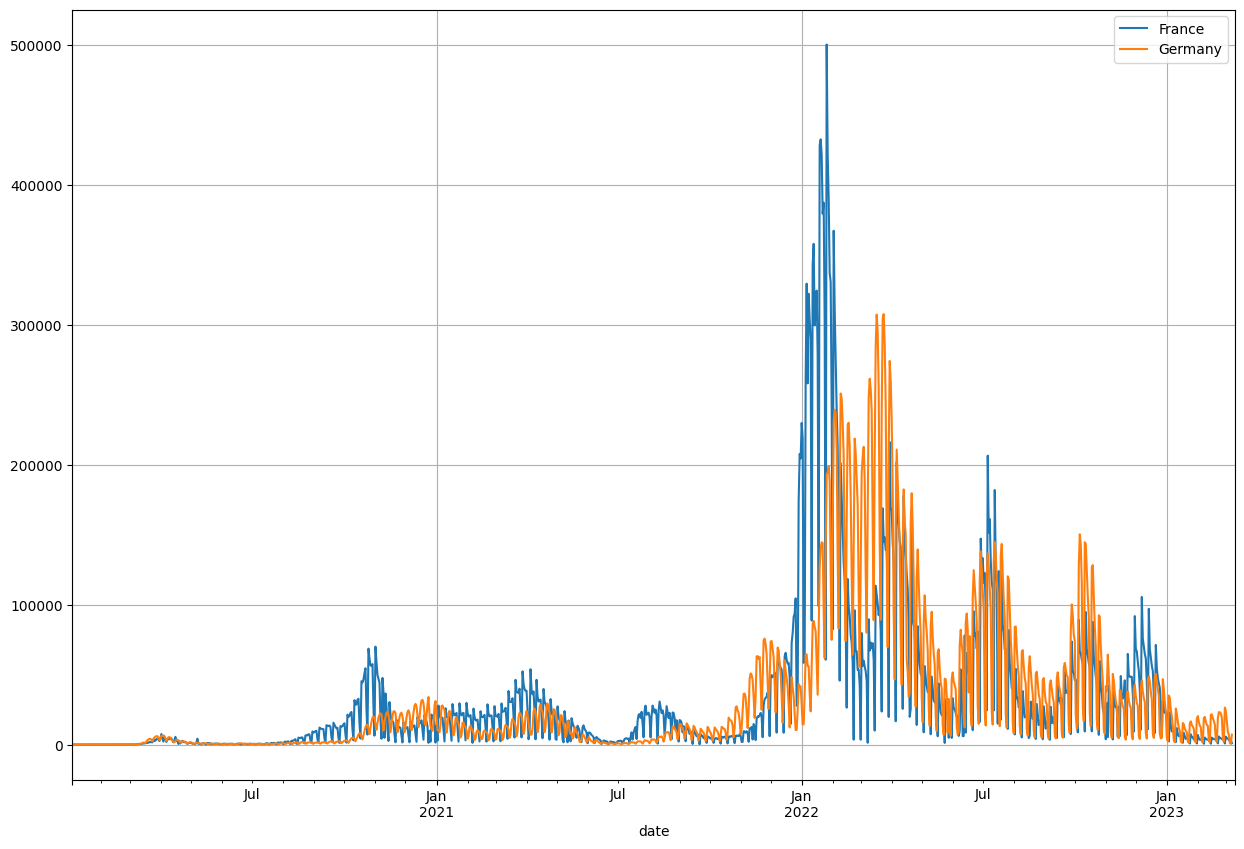

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
for name in countries:
    df[df.location == name].new_cases.plot(ax=ax)
ax.grid()
plt.legend(countries)

Graph Smoothing

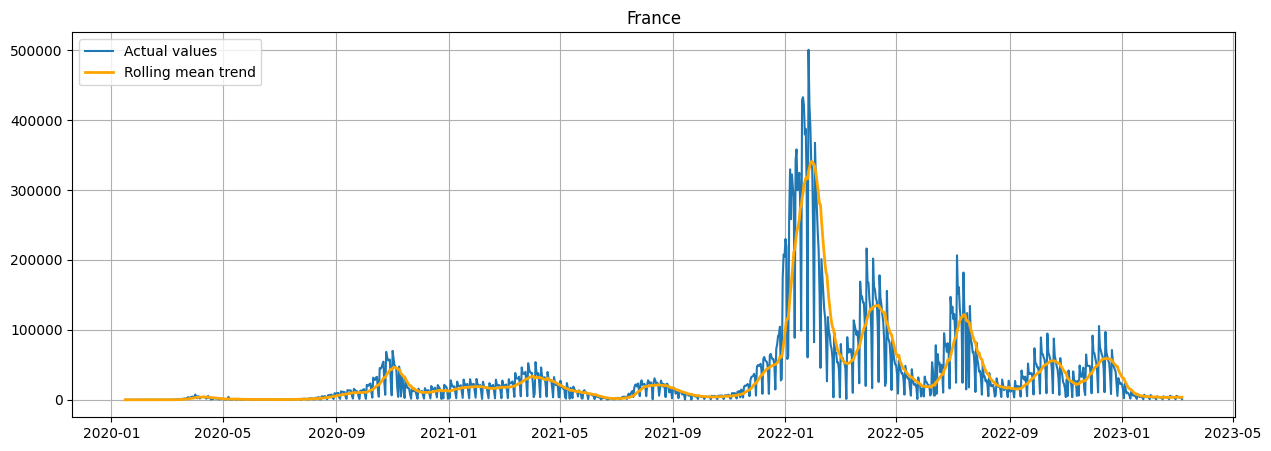

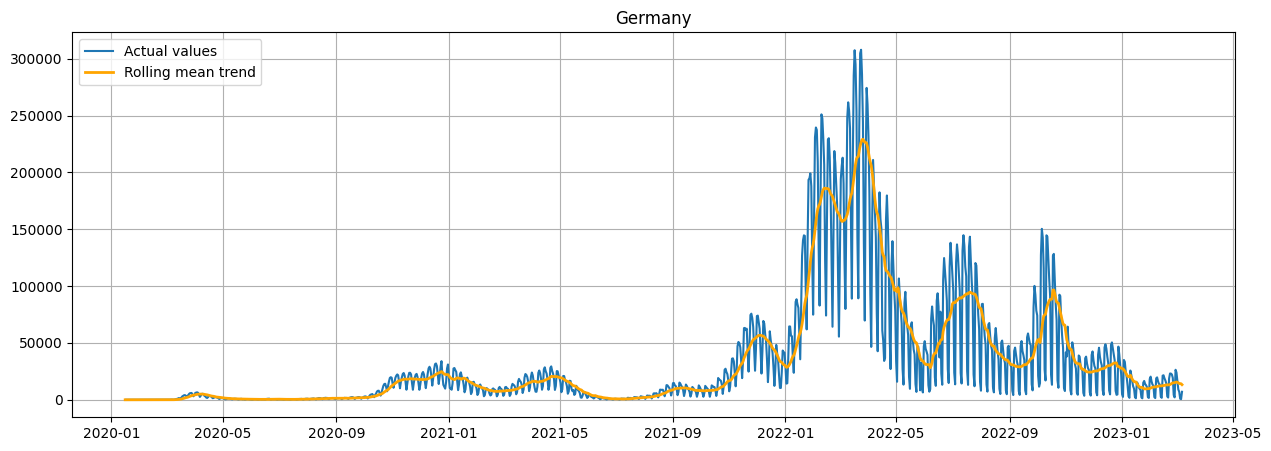

In [5]:
def plot_moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 5))
    plt.title(f'Moving average\n window size = {n}')
    plt.plot(series[n:], label='Actual values')
    plt.plot(rolling_mean, c='orange', linewidth=2, label='Rolling mean trend')
    plt.legend(loc='upper left')
    plt.grid(True)
for name in countries:
    plot_moving_average(df[df.location == name].new_cases, 14)
    plt.title(name)

Decomposition

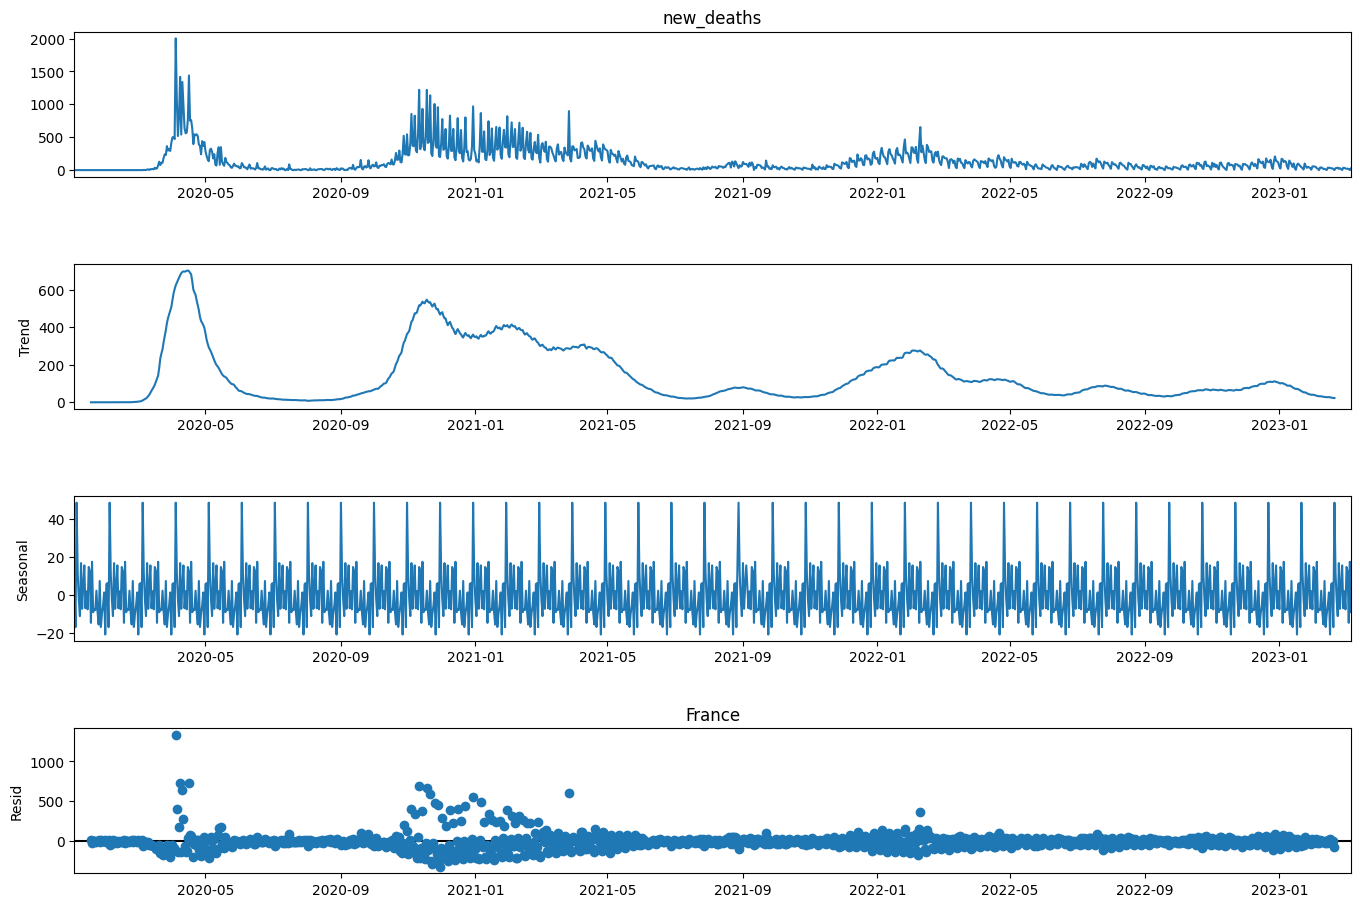

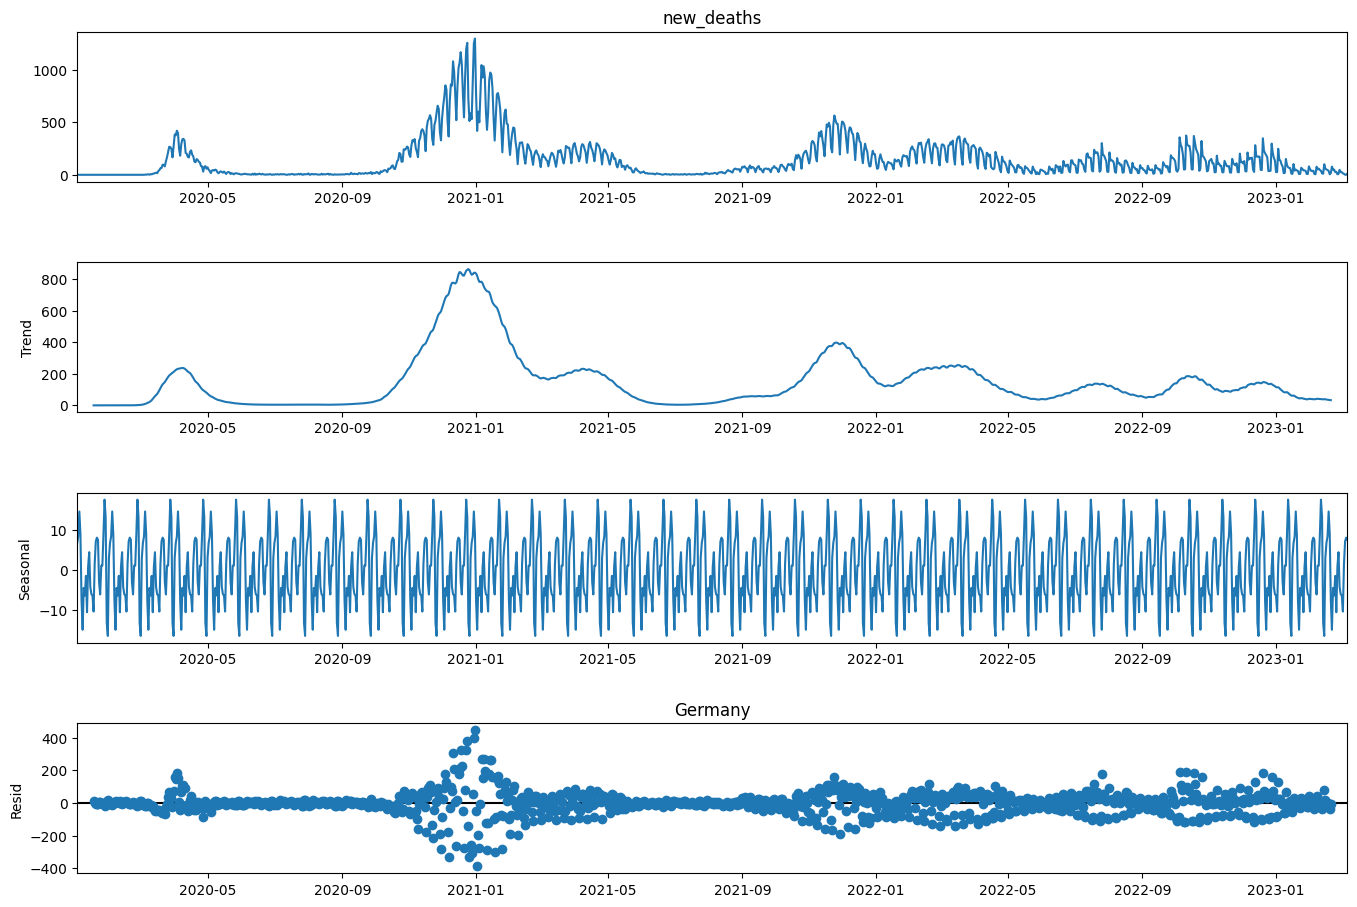

In [6]:
for name in countries:
    smt.seasonal_decompose(df[(~df.new_deaths.isna()) & (df.location == name)].new_deaths, period=30).plot().set_size_inches(15, 10)
    plt.title(name)
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


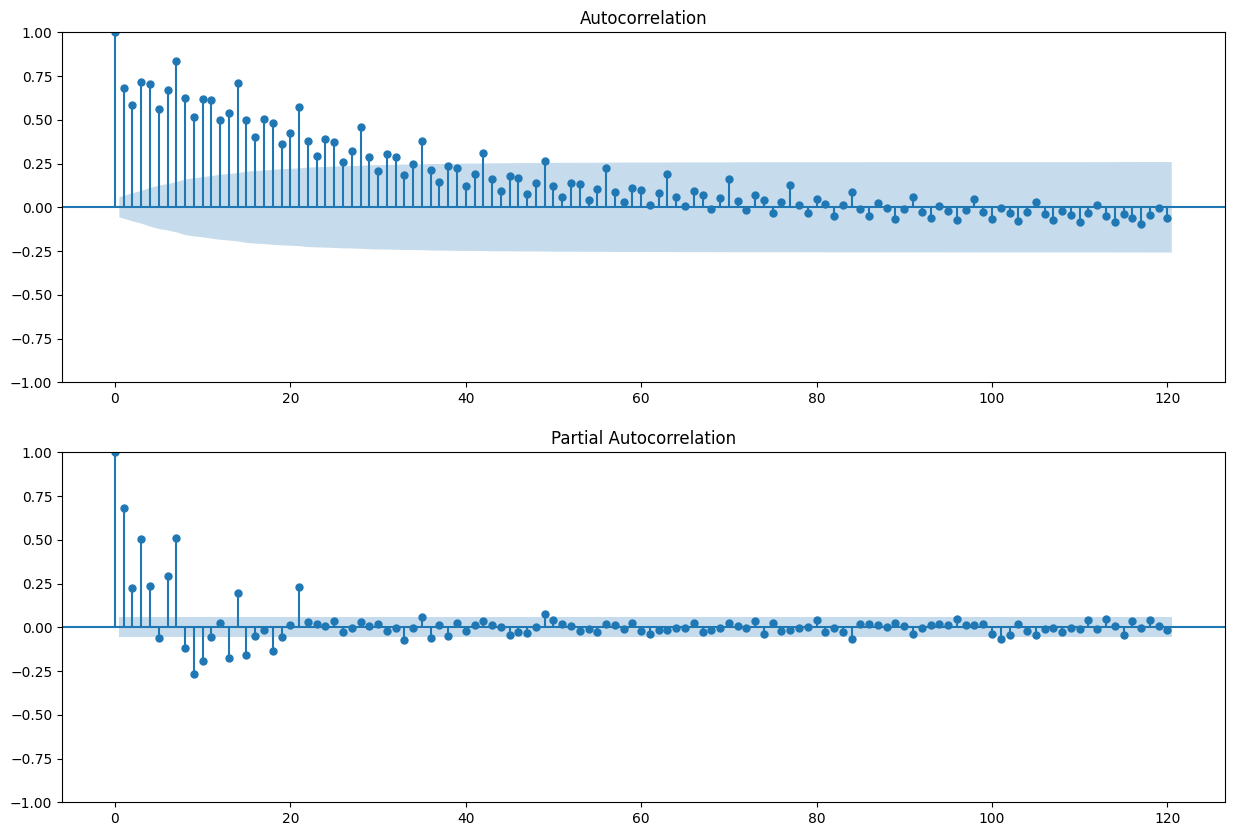

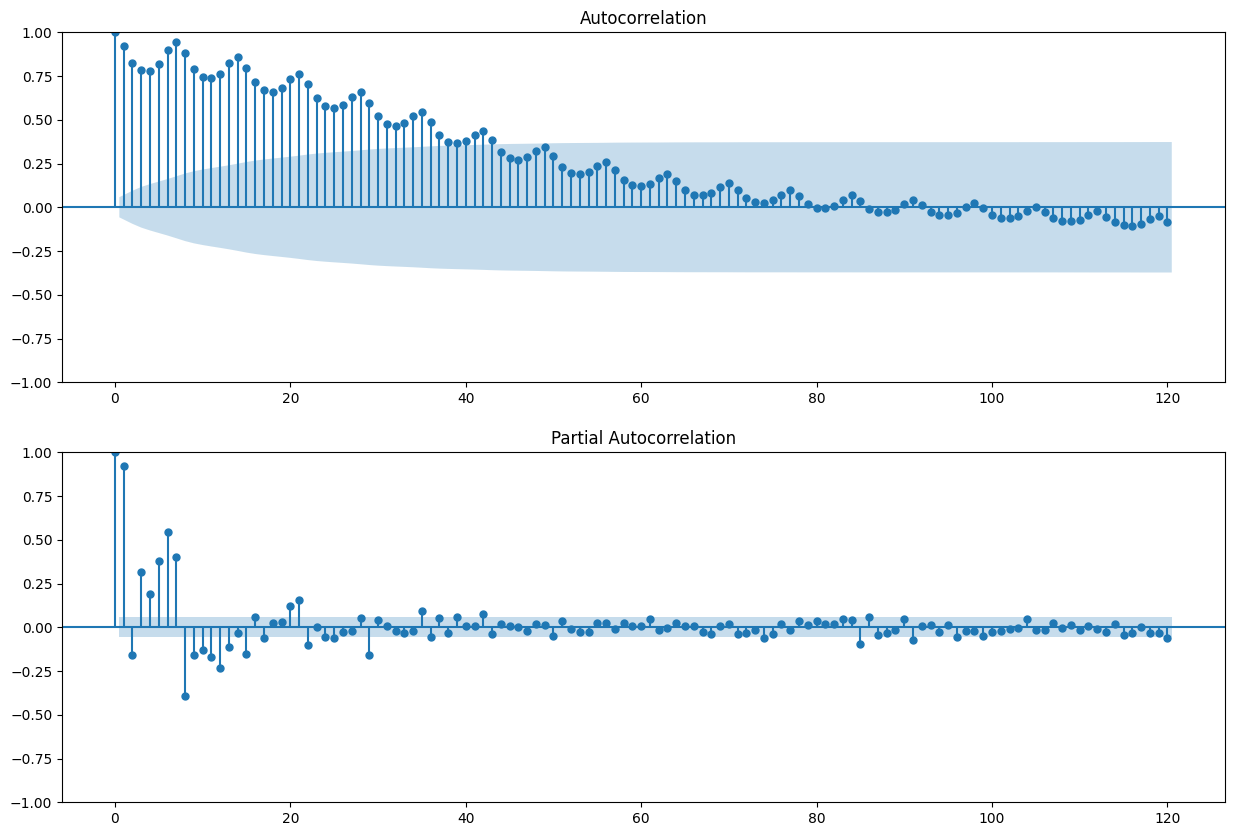

In [7]:

for name in countries:
    fig, ax = plt.subplots(2, figsize=(15, 10))
    dd = df[(~df.new_deaths.isna()) & (df.location == name)].new_deaths
    ax[0] = plot_acf(dd, ax=ax[0], lags=120)
    ax[1] = plot_pacf(dd, ax=ax[1], lags=120)

Stationarity

In [8]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('Навні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

for name in countries:
    print(name)
    dickey_fuller_test(df[(~df.new_deaths.isna()) & (df.location == name)].new_deaths)



France
adf:  -3.863007825198076
p-value:  0.002324600221443343
Critical values:  {'1%': -3.436114401808766, '5%': -2.8640853428381092, '10%': -2.568125207156112}
Одиничні корені відсутні, ряд є стаціонарним.
Germany
adf:  -3.2158987236395693
p-value:  0.019082647020864603
Critical values:  {'1%': -3.4361093249345402, '5%': -2.8640831032339706, '10%': -2.5681240143809787}
Одиничні корені відсутні, ряд є стаціонарним.


Correlation

In [9]:
df[df.location == countries[0]].new_cases.corr(df[df.location == countries[1]].new_cases)

0.5911568933928973

USD / UAH Rate

In [10]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

df = pd.read_csv('data/usd_uah.csv', index_col='Date', parse_dates=['Date'])[::-1].loc[:, 'Price']
df

2023-03-15 18:16:38.159683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 18:16:38.508030: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 18:16:38.508053: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-15 18:16:39.855466: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Date
2020-01-13    24.0813
2020-01-14    23.7300
2020-01-15    24.1175
2020-01-16    24.1450
2020-01-17    24.3084
               ...   
2023-03-06    36.9070
2023-03-07    36.9200
2023-03-08    36.9290
2023-03-09    36.8950
2023-03-10    36.9290
Name: Price, Length: 798, dtype: float64

In [11]:
dataset = df.values.reshape(-1, 1)

Training Data Length

In [12]:
training_data_len = math.ceil(dataset.shape[0] * 0.8)
training_data_len

639

Scale Data

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Training Data

In [14]:
train_data = scaled_data[0:training_data_len, :]
train_period = 60
x_train, y_train = [], []
for i in range(train_period, len(train_data)):
    x_train.append(train_data[i-train_period:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

Reshape

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(579, 60, 1)

LSTM Model

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2023-03-15 18:16:41.100428: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-15 18:16:41.101069: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-15 18:16:41.101102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2023-03-15 18:16:41.101782: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Compile model

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train Model

In [18]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

579/579 [==============================] - 15s 22ms/step - loss: 0.0041


Testing Dataset

In [19]:
test_data = scaled_data[training_data_len - train_period:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(train_period, len(test_data)):
    x_test.append(test_data[i-train_period:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Predictions

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 10ms/step


Get the root mean squared value

In [21]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.6277942372831911

Plot Data

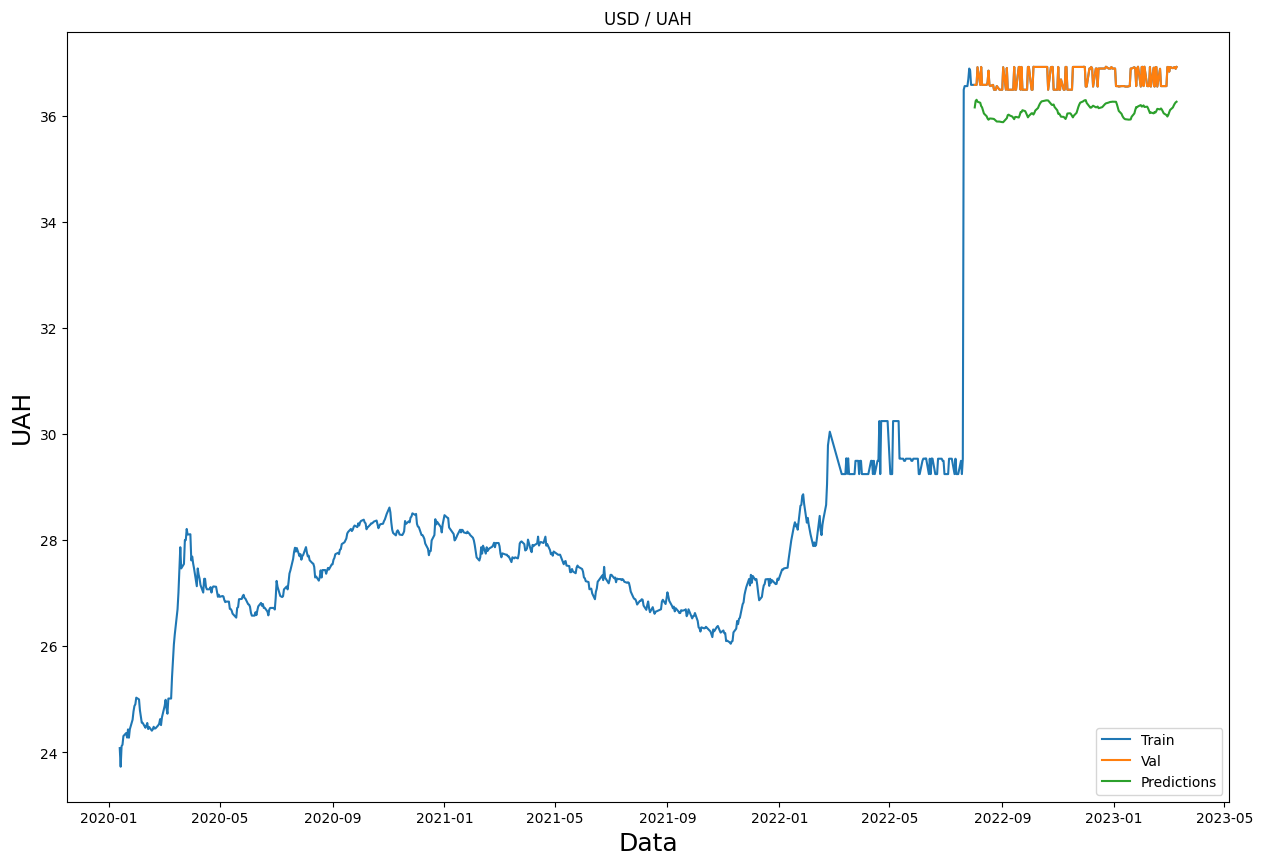

In [22]:
train = df[:training_data_len]
valid = df[training_data_len:].to_frame()
valid.columns = ['Valid']
valid['Predictions'] = predictions
plt.figure(figsize=(15, 10))
plt.title('USD / UAH')
plt.xlabel('Data', fontsize=18)
plt.ylabel('UAH', fontsize=18)
plt.plot(df)
plt.plot(valid[['Valid', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

Additional Assignment

In [23]:
from my_predictions import get_predictions
import datetime as dt
path = 'data/seattleWeather_1948-2017 copy.csv'
df = pd.read_csv(path, index_col=['DATE'], parse_dates=['DATE'])
def plot_predictions(df: pd.DataFrame, predictions: np.array, column_train: str):
    train = df[column_train]
    days = predictions.shape[0]
    end_date: dt.date = df.tail(1).index.item().to_pydatetime().date()
    index = [end_date + dt.timedelta(days=i) for i in range(days)]
    valid = pd.Series(predictions, index=index)
    plt.figure(figsize=(15, 10))
    plt.title(column_train)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column_train, fontsize=18)
    plt.plot(train)
    plt.plot(valid)
    plt.legend(['Train', 'Val'], loc='lower right')
df

,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True
...,...,...,...,...
1953-03-27,0.47,52,39,True
1953-03-28,0.51,49,38,True
1953-03-29,0.00,52,38,False


1/1 [==============================] - 0s 35ms/step


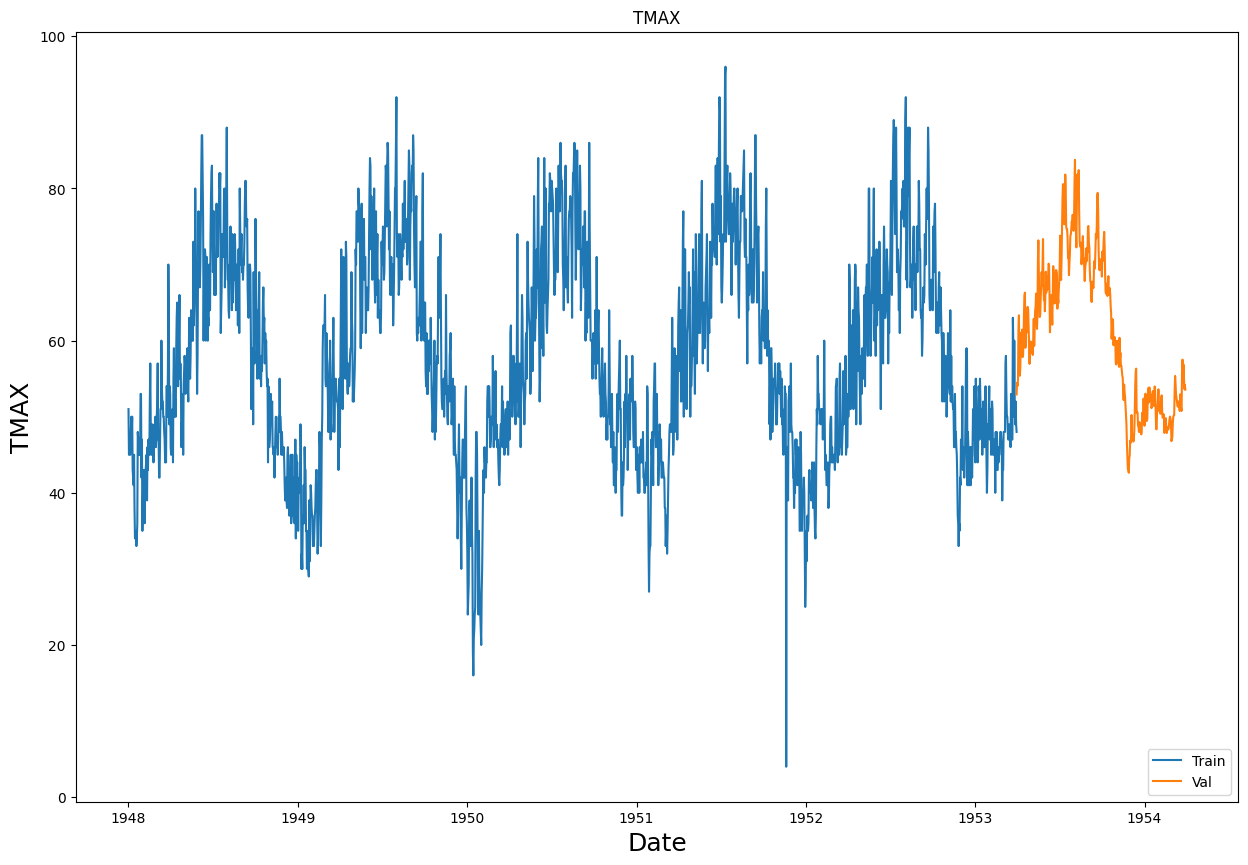

In [24]:
predictions = get_predictions(df, 'TMAX', 365, 100, 40)
plot_predictions(df, predictions, 'TMAX')

1/1 [==============================] - 0s 41ms/step


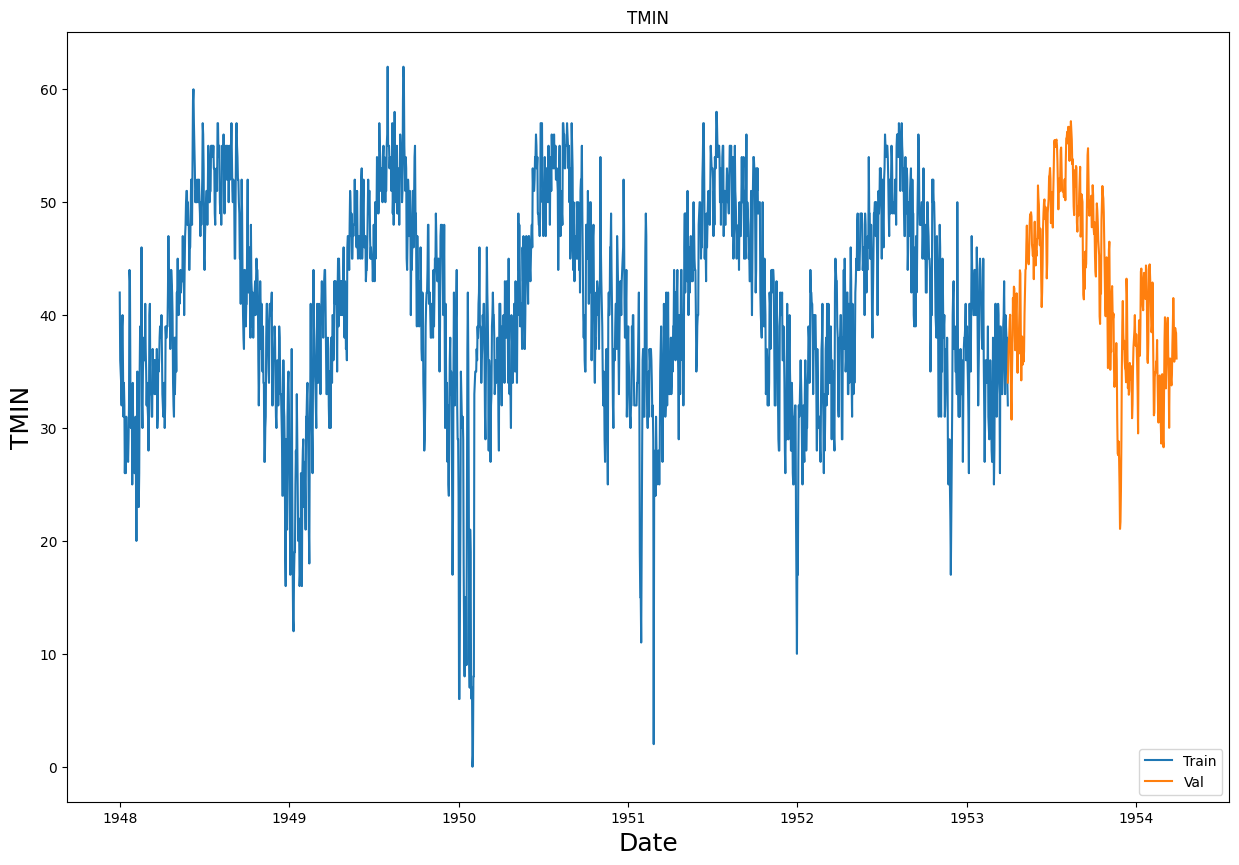

In [25]:
predictions = get_predictions(df, 'TMIN', 365, 100, 40)
plot_predictions(df, predictions, 'TMIN')

Results

Під ча лабораторної роботи було виконано тренування моделей для прогнозування опадів, курсу гривні до долара. Курс гривні до долара показує, гарні тестові результати з невиликою середньоквадратичною похибкою. Під час тренування моделі для опадів бачимо графіки, прогнозовані значення на яких відповідають періодам опадів минулих років; можна сказати, що модель працює добре. Також була проаналізована статистика поширення COVID-19, побудовано графіки сезонних декомпозицій.